In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

train = pd.read_csv('/kaggle/input/playground-series-s3e19/train.csv')
test = pd.read_csv('/kaggle/input/playground-series-s3e19/test.csv')
test['num_sold'] = 300 # this is dummy for simplify concat

train.columns

Index(['id', 'date', 'country', 'store', 'product', 'num_sold'], dtype='object')

In [2]:
# Set columns
target_col = 'num_sold'
cat_cols = ['country', 'store', 'product']

# To Datetime
train['date'] = pd.to_datetime(train['date'])
test['date'] = pd.to_datetime(test['date'])

# Repalece "Using LLMs to"
train['product'] = train['product'].str.replace('Using LLMs to ', '')
test['product'] = test['product'].str.replace('Using LLMs to ', '')



In [3]:
analysis = train
uniques = {}

for column in analysis.columns:
    uniques[column] = analysis[column].unique().tolist()
print(uniques['country'])
print(uniques['store'])
print(uniques['product'])

['Argentina', 'Canada', 'Estonia', 'Japan', 'Spain']
['Kaggle Learn', 'Kaggle Store', 'Kagglazon']
['Improve Your Coding', 'Train More LLMs', 'Win Friends and Influence People', 'Win More Kaggle Competitions', 'Write Better']


In [4]:
import datetime as dt

# date column is separated for each element
analysis['date']  = pd.to_datetime(analysis['date'])
analysis['day']   = analysis['date'].dt.day
analysis['week' ] = analysis['date'].dt.dayofweek
analysis['month'] = analysis['date'].dt.month
analysis['year']  = analysis['date'].dt.year
analysis['time_no'] = (analysis['date'] - dt.datetime(2017, 1, 1)) // dt.timedelta(days=1)
date_columns = ['date', 'day', 'week', 'month', 'year', 'time_no']


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


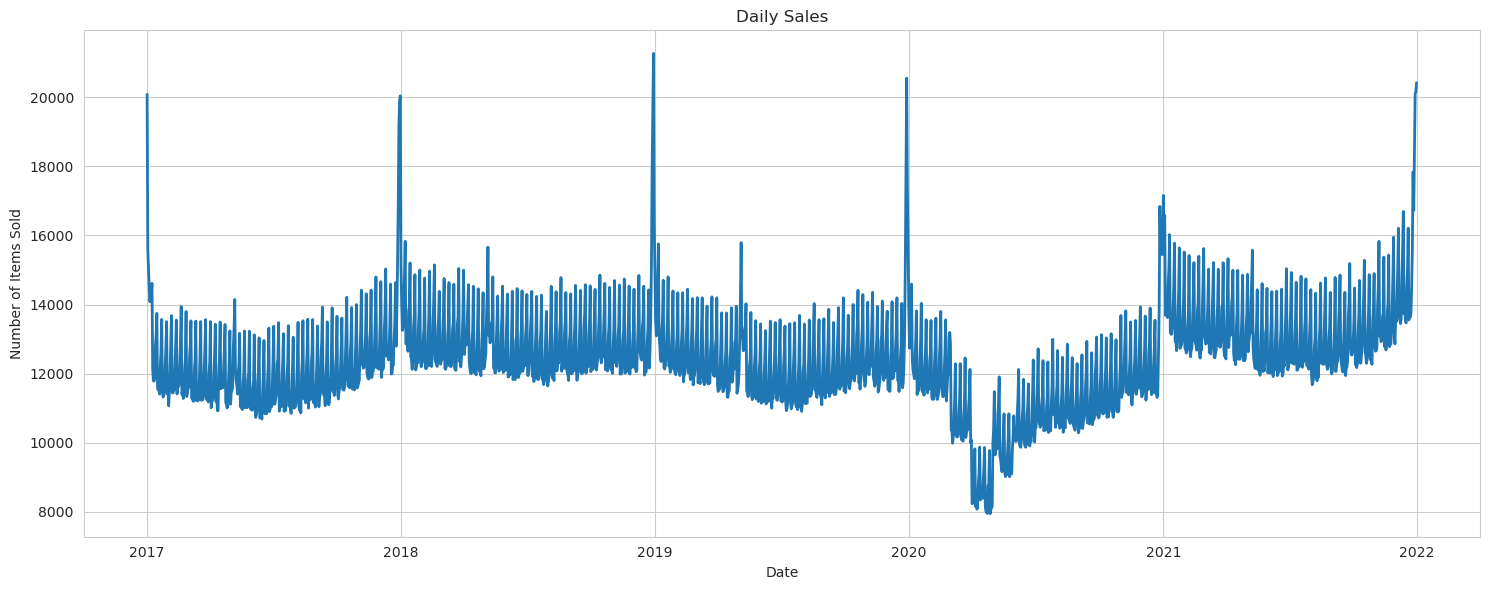

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_daily_sales(df):
    plt.figure(figsize=(15, 6))
    df_grouped = df.groupby('date')['num_sold'].sum().reset_index()

    sns.set_style("whitegrid")
    sns.lineplot(data=df_grouped, x='date', y='num_sold', linewidth=2)
    plt.xlabel('Date')
    plt.ylabel('Number of Items Sold')
    plt.title('Daily Sales')
    plt.tight_layout()

    plt.show()

plot_daily_sales(analysis)

In [6]:
group_store = analysis[['store', 'num_sold']].groupby('store')
print(group_store.min())
print(group_store.max())
print(group_store.mean())
print(group_store.std())

              num_sold
store                 
Kagglazon           12
Kaggle Learn         2
Kaggle Store         3
              num_sold
store                 
Kagglazon         1380
Kaggle Learn       252
Kaggle Store       383
                num_sold
store                   
Kagglazon     343.074151
Kaggle Learn   60.370953
Kaggle Store   93.122804
                num_sold
store                   
Kagglazon     219.786586
Kaggle Learn   38.926967
Kaggle Store   59.863260


In [7]:
mean_country_year = analysis.groupby(['country', 'year'], as_index=False).mean()

analysis = pd.merge(analysis, mean_country_year.loc[mean_country_year['year'] == 2018,
                    ['country', 'num_sold']].rename(columns={'num_sold':'mean_2018'}),
                    on=['country'])

analysis = pd.merge(analysis, mean_country_year.loc[mean_country_year['year'] == 2020, 
                    ['country', 'num_sold']].rename(columns={'num_sold':'mean_2020'}),
                    on=['country'])

analysis['check'] = analysis['num_sold'] * analysis['mean_2020']/ analysis['mean_2018']

analysis.loc[analysis['year'] == 2020, 'check'] = analysis['num_sold']

columns = ['date', 'product', 'check']

					  
df_country = pd.merge(analysis.loc[analysis['country']=='Argentina', 
                                   columns].rename(columns={'check':'Argentina'}),
             pd.merge(analysis.loc[analysis['country']=='Canada' , 
                                   columns].rename(columns={'check':'Canada' }),
             pd.merge(analysis.loc[analysis['country']=='Estonia', 
                                   columns].rename(columns={'check':'Estonia'}),
             pd.merge(analysis.loc[analysis['country']=='Japan'  , 
                                   columns].rename(columns={'check':'Japan'  }),
                      analysis.loc[analysis['country']=='Spain'  , 
                                   columns].rename(columns={'check':'Spain'  }),
                      on=['date','product']),
                      on=['date','product']),
                      on=['date','product']),
                      on=['date','product'])

df_country['mean'] = df_country[['Argentina', 
                                 'Canada',
                                 'Estonia',
                                 'Japan',
                                 'Spain'
                                 ]].mean(axis=1)


diffs = []
diffs += (df_country['mean'] - df_country['Argentina']).values.tolist()
diffs += (df_country['mean'] - df_country['Canada']).values.tolist()
diffs += (df_country['mean'] - df_country['Estonia']).values.tolist()
diffs += (df_country['mean'] - df_country['Japan']).values.tolist()
diffs += (df_country['mean'] - df_country['Spain']).values.tolist()

rates = []
rates += ((df_country['mean'] - df_country['Argentina']).abs() / df_country['Argentina']).values.tolist()
rates += ((df_country['mean'] - df_country['Canada']).abs() / df_country['Canada']).values.tolist()
rates += ((df_country['mean'] - df_country['Estonia']).abs() / df_country['Estonia']).values.tolist()
rates += ((df_country['mean'] - df_country['Japan']).abs() / df_country['Japan']).values.tolist()
rates += ((df_country['mean'] - df_country['Spain']).abs() / df_country['Spain']).values.tolist()

/tmp/ipykernel_20/1200499881.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_country_year = analysis.groupby(['country', 'year'], as_index=False).mean()


Rounded error     :7.60000 ~ 665.74938
Range of error    :-869.88895 ~ 594.86404
Mean rate of error:1.55483


,date,product,Argentina,Canada,Estonia,Japan,Spain,mean
0,2017-01-01,Improve Your Coding,41.580784,172.491323,86.068934,154.983609,99.279584,110.880847
1,2017-01-01,Improve Your Coding,41.580784,172.491323,86.068934,154.983609,144.036773,119.832284
2,2017-01-01,Improve Your Coding,41.580784,172.491323,86.068934,154.983609,589.167366,208.858403
3,2017-01-01,Improve Your Coding,41.580784,172.491323,86.068934,250.572302,99.279584,129.998585
4,2017-01-01,Improve Your Coding,41.580784,172.491323,86.068934,250.572302,144.036773,138.950023
5,2017-01-01,Improve Your Coding,41.580784,172.491323,86.068934,250.572302,589.167366,227.976142
6,2017-01-01,Improve Your Coding,41.580784,172.491323,86.068934,870.506737,99.279584,253.985472
7,2017-01-01,Improve Your Coding,41.580784,172.491323,86.068934,870.506737,144.036773,262.936910
8,2017-01-01,Improve Your Coding,41.580784,172.491323,86.068934,870.506737,589.167366,351.963029
9,2017-01-01,Improve Your Coding,41.580784,172.491323,123.490209,154.983609,99.279584,118.365102


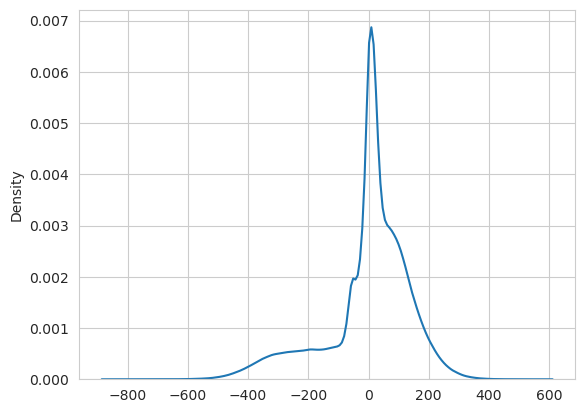

In [8]:
print('Rounded error     :{:.5f} ~ {:.5f}\nRange of error    :{:.5f} ~ {:.5f}\nMean rate of error:{:.5f}'.format(
            df_country['mean'].min(),
            df_country['mean'].max(),
            min(diffs),
            max(diffs),
            sum(rates) / len(rates)))
sns.kdeplot(diffs)

df_country.head(10)

In [9]:
def graph_by_hue(df, key, value, hue, start=0, end=1460):
    df = df.loc[df[key] == value]
    hue_values = df[hue].unique()
    for hue_value in hue_values:
        df_hue = df.loc[df[hue] == hue_value]
        plt.plot(df_hue['time_no'], df_hue['num_sold'])
    plt.xlabel('time')
    plt.ylabel('num_sold')
    plt.xlim(start, end)
    plt.show()

def graph_divided_by_country(df, country, start=0, end=1460):
    graph_by_hue(df,'country', country, 'product', start, end)

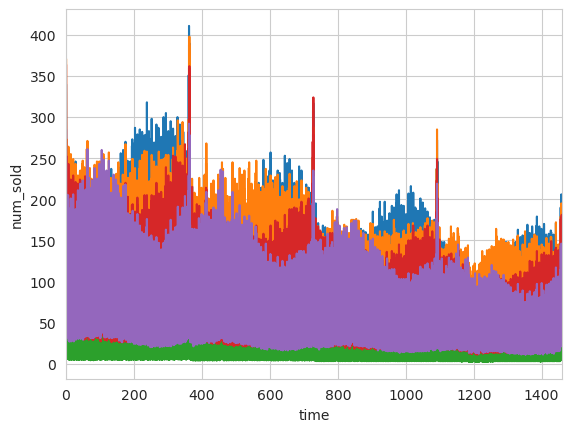

In [10]:
graph_divided_by_country(analysis, 'Argentina')

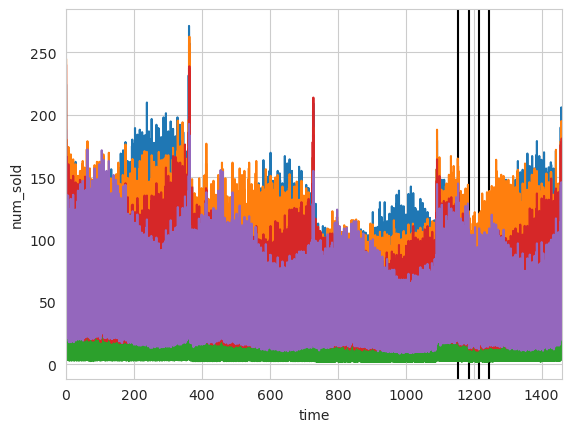

In [11]:
plt.axvline(x=1154, color='black')
plt.axvline(x=1185, color='black')
plt.axvline(x=1215, color='black')
plt.axvline(x=1246, color='black')
#plt.axvline(x=1276, color='black')
graph_divided_by_country(analysis[['country', 'product', 'time_no', 'check']].rename(columns={'check':'num_sold'}), 'Argentina')

# Feature Engeneering

In [12]:
df = pd.concat([train, test], axis=0)

# add date
df['date']  = pd.to_datetime(df['date'])
df['year']  = df['date'].dt.year
df['week']  = df['date'].dt.dayofweek
df['month'] = df['date'].dt.month
df['day']   = df['date'].dt.day
df['time_no'] = (df['date'] - dt.datetime(2017, 1, 1)) // dt.timedelta(days=1)
df.loc[df['date'] > dt.datetime(2020, 2, 29), 'time_no'] -= 1

In [13]:
# make even for 2020
df_not_outlier = df.copy()
df_not_outlier = df_not_outlier.loc[df_not_outlier['month'].isin([1,2])]
df_not_outlier = df_not_outlier.loc[(df_not_outlier['month'] >= 2) | (df_not_outlier['day'] >= 11)]
df_not_outlier = df_not_outlier.loc[(df_not_outlier['month'] <= 1) | (df_not_outlier['day'] <= 28)]
change = df_not_outlier.groupby(['store', 'country', 'product', 'week', 'year'], as_index=False).mean()
change = change[['store', 'country', 'product', 'week', 'year', 'num_sold']]

df = pd.merge(df, change.loc[change['year']==2018].rename(columns={'num_sold':'c2018'}).drop(columns='year'),
              on=['store', 'country', 'product', 'week'])
df = pd.merge(df, change.loc[change['year']==2020].rename(columns={'num_sold':'c2020'}).drop(columns='year'),
              on=['store', 'country', 'product', 'week'])
df.loc[df['year'] < 2020, 'num_sold'] *= df['c2020']
df.loc[df['year'] < 2020, 'num_sold'] /= df['c2018']

/tmp/ipykernel_20/3897509609.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  change = df_not_outlier.groupby(['store', 'country', 'product', 'week', 'year'], as_index=False).mean()


In [14]:
# New Year's holiday is outlier
df_not_outlier = df.loc[df['year'] < 2020]
df_not_outlier = df_not_outlier.loc[(df_not_outlier['month'] < 12) | (df_not_outlier['day'] < 26)]
df_not_outlier = df_not_outlier.loc[(df_not_outlier['month'] >  1) | (df_not_outlier['day'] >  8)]
mean = df_not_outlier.groupby(['store', 'country', 'product', 'week'], as_index=False).mean()
mean = mean[['store', 'country', 'product', 'week', 'num_sold']].rename(columns={'num_sold':'mean'})

df = pd.merge(df, mean, on=['store', 'country', 'product', 'week'])
df = df.sort_values('id').reset_index(drop=True)

/tmp/ipykernel_20/2581158053.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean = df_not_outlier.groupby(['store', 'country', 'product', 'week'], as_index=False).mean()


In [15]:
# sin wave
year_columns = ['year_sin_1', 'year_cos_1', 'year_sin_0.5', 'year_cos_0.5']
df['year_sin_1']   = np.sin(np.pi * df['time_no'] / 182.5) * df['mean']
df['year_cos_1']   = np.cos(np.pi * df['time_no'] / 182.5) * df['mean']
df['year_sin_0.5'] = np.sin(np.pi * df['time_no'] / 365.0) * df['mean']
df['year_cos_0.5'] = np.cos(np.pi * df['time_no'] / 365.0) * df['mean']

In [16]:
# New Year's holiday
special_date_columns = []
for day in range(25, 32):
    column = 'day_12_{}'.format(day)
    df[column] = df['mean'].where((df['month'] == 12) & (df['day'] == day), 0)
    special_date_columns.append(column)
for day in range(1, 11):
    column = 'day_1_{}'.format(day)
    df[column] = df['mean'].where((df['month'] == 1) & (df['day'] == day), 0)
    special_date_columns.append(column)

In [17]:
# product cross sin wave
product_year_columns = []
for product in uniques['product']:
    df[product] = (df['product'] == product).astype(int)
    for year in year_columns:
        product_year = '{}_{}'.format(product, year)
        df[product_year] = df[product] * df[year]
        product_year_columns.append(product_year)

In [18]:
from sklearn import linear_model

# decide using columns
use_columns = ['mean']
use_columns.extend(special_date_columns)
use_columns.extend(product_year_columns)

# learning
df_used = df.copy()
date = dt.datetime(2019,12,31)
df_used = df_used.loc[df_used['date'] <= date]
source = df_used[use_columns]
target = df_used['num_sold']

model = linear_model.LinearRegression(fit_intercept=False)
model.fit(source, target)
coef = pd.DataFrame(model.coef_, columns=['coef'])
coef['column'] = source.columns
coef.set_index('column', inplace=True)
#coef

In [19]:
from sklearn import metrics
# show results
df['predict'] = model.predict(df[use_columns])
df['error'] = df['num_sold'] - df['predict']
df['smape'] = 2 * df['error'].abs() / (df['num_sold'] + df['predict'])

result = df.loc[df['date'] <= date]
print('mae_lr = {}'.format(metrics.mean_absolute_error(result['num_sold'], result['predict'])))
print('mse_lr = {}'.format(metrics.mean_squared_error(result['num_sold'], result['predict'])))
print('smape  = {}'.format(result['smape'].mean()))

mae_lr = 9.380696394801436
mse_lr = 311.77600960096885
smape  = 0.07544708783084536


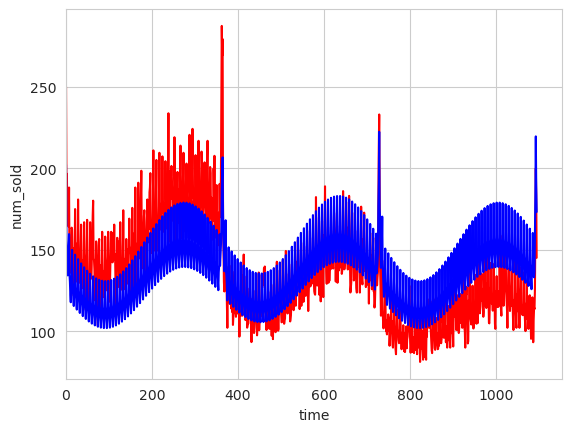

            date  week        mean      error
81385 2019-12-22     6  155.651451 -45.609635
75085 2019-09-29     6  155.651451 -45.129540
81460 2019-12-23     0  132.264578 -42.701810
71785 2019-08-16     4  132.412139 -40.980225
80860 2019-12-15     6  155.651451 -40.897784
75535 2019-10-05     5  136.950796 -40.144788
74785 2019-09-25     2  125.556279 -39.670264
70885 2019-08-04     6  155.651451 -39.645750
            date  week        mean       error
8185  2017-04-20     3  121.257414   57.516757
24610 2017-11-25     5  136.950796   57.593049
17860 2017-08-27     6  155.651451   59.374329
25885 2017-12-12     1  130.431237   70.232280
27310 2017-12-31     6  155.651451   72.675804
27235 2017-12-30     5  136.950796   73.095063
27085 2017-12-28     3  121.257414   74.973870
27160 2017-12-29     4  132.412139  100.652237


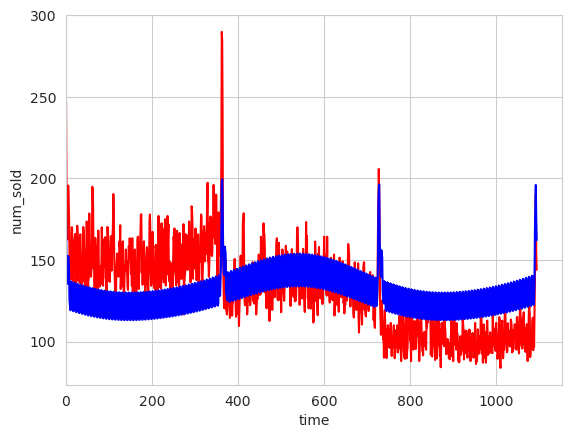

            date  week        mean      error
71411 2019-08-11     6  139.066667 -37.716776
81236 2019-12-20     4  139.705369 -37.311083
68636 2019-07-05     4  139.705369 -37.176950
66611 2019-06-08     5  139.091642 -36.690300
77111 2019-10-26     5  139.091642 -36.663322
55511 2019-01-11     4  139.705369 -36.246874
54986 2019-01-04     4  139.705369 -35.803022
80261 2019-12-07     5  139.091642 -35.713274
            date  week        mean      error
25736 2017-12-10     6  139.066667  57.175983
24686 2017-11-26     6  139.066667  59.712228
8261  2017-04-21     4  139.705369  59.873072
4661  2017-03-04     5  139.091642  60.767041
4586  2017-03-03     4  139.705369  62.140790
11    2017-01-01     6  139.066667  68.482812
27236 2017-12-30     5  139.091642  84.986706
27161 2017-12-29     4  139.705369  92.873539


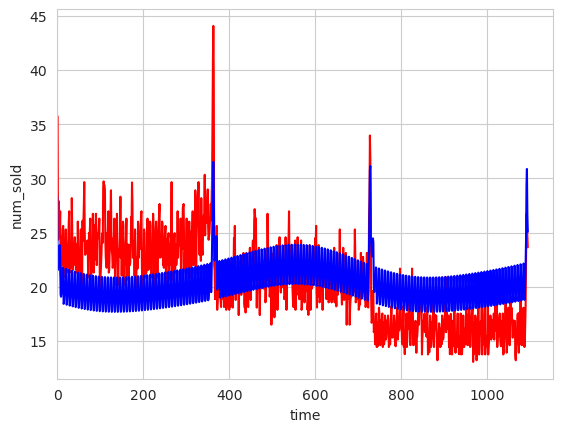

            date  week       mean     error
54837 2019-01-02     2  19.662637 -6.406900
54912 2019-01-03     3  19.946383 -5.916450
70287 2019-07-27     5  22.055152 -5.886128
80712 2019-12-13     4  20.365665 -5.684112
76062 2019-10-12     5  22.055152 -5.651300
54762 2019-01-01     1  18.862131 -5.612254
79962 2019-12-03     1  18.862131 -5.582360
71937 2019-08-18     6  21.954714 -5.580791
            date  week       mean      error
8262  2017-04-21     4  20.365665  10.089308
8187  2017-04-20     3  19.946383  10.465173
27312 2017-12-31     6  21.954714  10.586392
8112  2017-04-19     2  19.662637  11.089077
8037  2017-04-18     1  18.862131  11.323075
27162 2017-12-29     4  20.365665  11.939335
27237 2017-12-30     5  22.055152  12.539368
87    2017-01-02     0  18.694923  13.790322


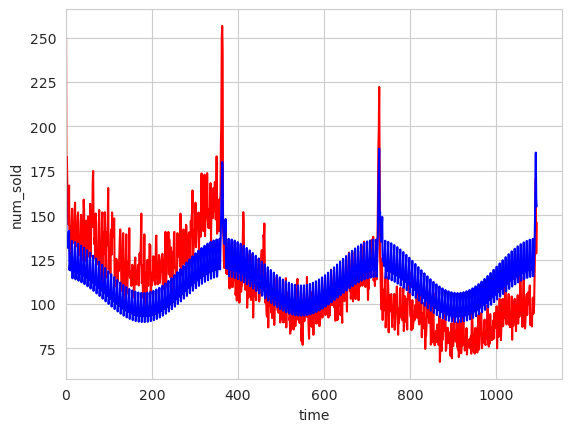

            date  week        mean      error
54988 2019-01-04     4  109.275015 -39.856298
81238 2019-12-20     4  109.275015 -35.624101
81313 2019-12-21     5  116.094609 -33.563732
57913 2019-02-12     1  106.884791 -33.290907
55213 2019-01-07     0  102.612090 -33.254517
81388 2019-12-22     6  121.355011 -33.086271
80038 2019-12-04     2  107.114971 -33.037969
55138 2019-01-06     6  121.355011 -32.425720
            date  week        mean      error
25963 2017-12-13     2  107.114971  48.667807
27088 2017-12-28     3  106.302378  48.673698
27013 2017-12-27     2  107.114971  48.908217
8038  2017-04-18     1  106.884791  49.145610
27313 2017-12-31     6  121.355011  67.636699
27238 2017-12-30     5  116.094609  76.669709
13    2017-01-01     6  121.355011  77.291891
27163 2017-12-29     4  109.275015  82.698350


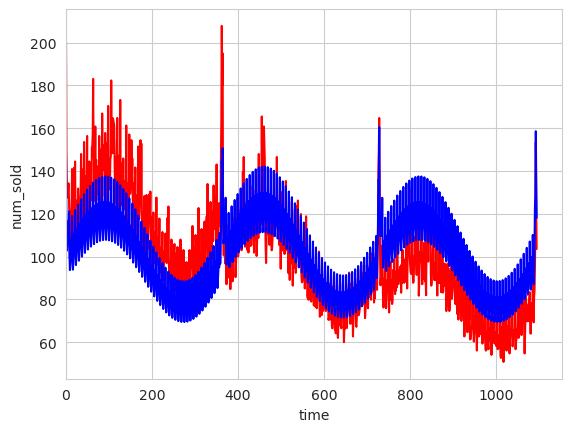

            date  week        mean      error
58289 2019-02-17     6  113.804060 -35.310717
56714 2019-01-27     6  113.804060 -34.586391
58814 2019-02-24     6  113.804060 -33.700100
62789 2019-04-18     3   96.234186 -33.592394
61514 2019-04-01     0   95.086364 -33.110098
62489 2019-04-14     6  113.804060 -30.469003
66689 2019-06-09     6  113.804060 -29.563984
66164 2019-06-02     6  113.804060 -29.394238
            date  week        mean      error
7889  2017-04-16     6  113.804060  45.439430
12989 2017-06-23     4  103.982318  47.363599
12914 2017-06-22     3   96.234186  47.426382
4739  2017-03-05     6  113.804060  48.418656
8189  2017-04-20     3   96.234186  49.298404
14    2017-01-01     6  113.804060  52.668132
8039  2017-04-18     1   89.242436  57.167852
27164 2017-12-29     4  103.982318  62.879378


In [20]:
result_graph = result.loc[(result['country'] == 'Argentina') & 
                          (result['store'] == 'Kagglazon')]
for product in uniques['product']:
    view = result_graph.loc[result_graph['product'] == product]
    plt.plot(view['time_no'], view['num_sold'], color='red')
    plt.plot(view['time_no'], view['predict'], color='blue')
    plt.xlabel('time')
    plt.ylabel('num_sold')
    plt.xlim(0, 1153)
    plt.show()
    
    print(view[['date', 'week', 'mean', 'error']].sort_values('error').head(8))
    print(view[['date', 'week', 'mean', 'error']].sort_values('error').tail(8))

## Using Librarie Holidays

In [21]:
!pip install --upgrade holidays

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 642.9/642.9 kB 8.8 MB/s eta 0:00:00
  Attempting uninstall: holidays
    Found existing installation: holidays 0.24
    Uninstalling holidays-0.24:
      Successfully uninstalled holidays-0.24


In [22]:
from holidays import country_holidays


ar_holidays = country_holidays('AR',years= {2017,2018,2019,2020,2021} )
ca_holidays = country_holidays('CA',years= {2017,2018,2019,2020,2021} )
ee_holidays = country_holidays('EE', years= {2017,2018,2019,2020,2021})
jp_holidays = country_holidays('JP', years= {2017,2018,2019,2020,2021})
es_holidays = country_holidays('ES', years= {2017,2018,2019,2020,2021})

holidays_date_name = ar_holidays + ca_holidays + ee_holidays + jp_holidays + es_holidays

In [23]:
country_names = ['Argentina', 'Canada', 'Estonia', 'Japan', 'Spain']
holiday_data = {}

for country_name in country_names:
     holiday_data[country_name] = {date: country_name for date in holidays_date_name.keys()}

        
holidays = pd.DataFrame([(date, holiday_name) for holidays in holiday_data.values()
                            for date, holiday_name in holidays.items()],
                           columns=['date', 'country'])

holidays['date'] = pd.to_datetime(holidays['date'])
holidays['tmp'] = 1

In [24]:
df = pd.concat([train, test], axis=0)
df['log'] = np.log(df['num_sold'])

# add date
df['date']  = pd.to_datetime(df['date'])
df['year']  = (df['date'] - dt.timedelta(days=1)).dt.year
df.loc[df['date'] == dt.datetime(2017, 1, 1), 'year']  = 2017
df['week']  = df['date'].dt.dayofweek
df['month'] = df['date'].dt.month
df['day']   = df['date'].dt.day
df['time_no'] = (df['date'] - dt.datetime(2017, 1, 1)) // dt.timedelta(days=1)

In [25]:
# holidays
holiday_diff = [np.exp(-(i - 5.5) ** 2 / 8.3) for i in range(12)]
holidays_columns = ['holiday']
df['holiday'] = 0
for day_no, diff in enumerate(holiday_diff):
    shifted = holidays.copy()
    shifted['date'] = shifted['date'] + dt.timedelta(days=day_no-1)
    df = pd.merge(df, shifted, on=['country', 'date'], how='left')
    df['tmp'].fillna(0, inplace=True)
    df['holiday'] += df['tmp'] * diff
    df.drop(columns='tmp', inplace=True)

In [26]:
# New Year's holidays
special_date_columns = []
for day in range(25, 32):
    column = 'day_12_{}'.format(day)
    df[column] = ((df['month'] == 12) & (df['day'] == day)).astype(float)
    special_date_columns.append(column)
for day in range(1, 11):
    column = 'day_1_{}'.format(day)
    df[column] = ((df['month'] == 1) & (df['day'] == day)).astype(float)
    special_date_columns.append(column)

In [27]:
# week flag
week_columns = []
for week in range(4, 7):
    column = 'week_{}'.format(week)
    df[column] = (df['week'] == week).astype(float)
    week_columns.append(column)

In [28]:
# influence of corona?
featured_month_columns = ['diff_exp_before', 'diff_exp_after', 'year_2020']
df['diff_exp_before'] = 0
month_diff = [2 ** (month - 2) for month in range(-2, 4)]
for month_no, diff in enumerate(month_diff[:2]):
    df.loc[(df['year'] == 2019) & (df['month'] == month_no + 11), 'diff_exp_before'] = diff
for month_no, diff in enumerate(month_diff[2:]):
    df.loc[(df['year'] == 2020) & (df['month'] == month_no +  1), 'diff_exp_before'] = diff
df['diff_exp_after'] = 0
month_diff = [2 ** (1 - month) for month in range(5, 10)]
for month_no, diff in enumerate(month_diff):
    df.loc[(df['year'] == 2020) & (df['month'] == month_no +  5), 'diff_exp_after'] = diff

df['year_2020'] = ((df['year'] == 2020) &
                   (df['date'] <= dt.datetime(2020, 4, 30))).astype(float)

In [29]:
# sin wave
df['year_sin_1']   = np.sin(np.pi * df['time_no'] / 182.5)
df['year_cos_1']   = np.cos(np.pi * df['time_no'] / 182.5)
df['year_sin_0.5'] = np.sin(np.pi * df['time_no'] / 365.0)
df['year_cos_0.5'] = np.cos(np.pi * df['time_no'] / 365.0)

# products cross sin wave
product_wave_columns = []
for product in uniques['product']:
    df[product] = (df['product'] == product).astype(float)
    product_sin = '{}_sin'.format(product)
    product_cos = '{}_cos'.format(product)
    df[product_sin] = df[product] * df['year_sin_1']
    df[product_cos] = df[product] * df['year_cos_1']
    product_wave_columns.append(product_sin)
    product_wave_columns.append(product_cos)

In [30]:
# country cross year
year_columns = []
for country in uniques['country']:
    for year in [2017, 2018, 2019,2021]:
        column = '{}_{}'.format(country, year)
        df[column] = ((df['country'] == country) &
                      (df['year'] == year)).astype(float)
        year_columns.append(column)

In [31]:
# Store

# Mapear a coluna 'store' para números usando as categorias e rótulos correspondentes
category_mapping = {'Kaggle Learn': 1, 'Kaggle Store': 2, 'Kagglazon': 3}
df['store_category'] = df['store'].map(category_mapping).astype(float)

In [32]:
product_columns = []
for product in uniques['product'][1:]:
    column = 'product_{}'.format(product)
    df[column] = (df['product'] == product).astype(float)
    product_columns.append(column)

In [33]:
# dicide use columns
use_columns = ['store_category']
use_columns.extend(special_date_columns)
use_columns.extend(product_wave_columns)
use_columns.extend(holidays_columns)
use_columns.extend(week_columns)
use_columns.extend(product_columns)
use_columns.extend(featured_month_columns)
use_columns.extend(year_columns)

# learning
df.sort_values('id', inplace=True)
df_used = df.copy()
date = dt.datetime(2021, 12, 31)
df_used = df_used.loc[df_used['date'] <= date]
source = df_used[use_columns]
target = df_used['log']

model = linear_model.LinearRegression()
model.fit(source, target)
coef = pd.DataFrame(model.coef_, columns=['coef'])
coef['column'] = source.columns
coef.set_index('column', inplace=True)
coef.loc['intercept'] = model.intercept_

In [34]:
# show results
df['predict_log'] = model.predict(df[use_columns])
df['predict_exp'] = np.exp(df['predict_log'])

df['error_log'] = df['log'] - df['predict_log']
df['smape_log'] = 2 * df['error_log'].abs() / (df['log'] + df['predict_log'])

df['error_exp'] = df['num_sold'] - df['predict_exp']
df['smape_exp'] = 2 * df['error_exp'].abs() / (df['num_sold'] + df['predict_exp'])

df['error_log'] = df['log'] - df['predict_log']
df['error_exp'] = df['num_sold'] - df['predict_exp']

df_check = df.loc[df['date'] < date]
print('#l mae_lr = {}'.format(metrics.mean_absolute_error(df_check['log'], df_check['predict_log'])))
print('#l mse_lr = {}'.format(metrics.mean_squared_error(df_check['log'], df_check['predict_log'])))
print('#l smape  = {}'.format(df_check['smape_log'].mean()))
print('#e mae_lr = {}'.format(metrics.mean_absolute_error(df_check['num_sold'], df_check['predict_exp'])))
print('#e mse_lr = {}'.format(metrics.mean_squared_error(df_check['num_sold'], df_check['predict_exp'])))
print('#e smape  = {}'.format(df_check['smape_exp'].mean()))

#l mae_lr = 0.25735405568451775
#l mse_lr = 0.116151201900506
#l smape  = 0.0633184147293967
#e mae_lr = 36.130180851909785
#e mse_lr = 3600.830730069785
#e smape  = 0.2509070826622927


Argentina


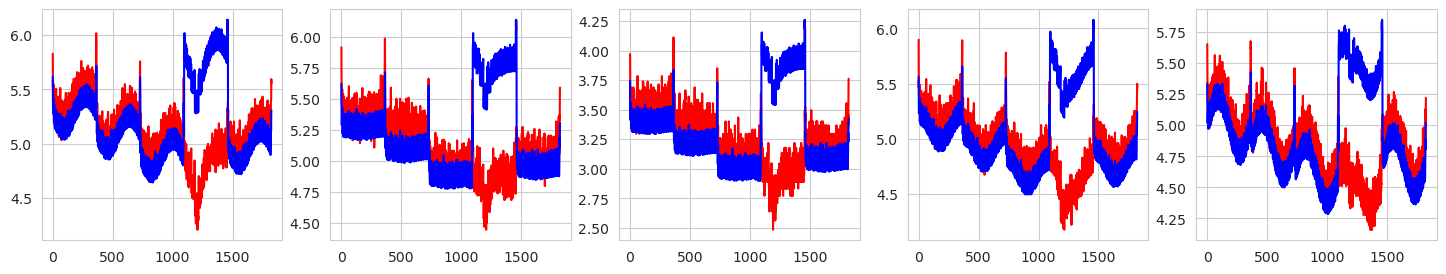

Canada


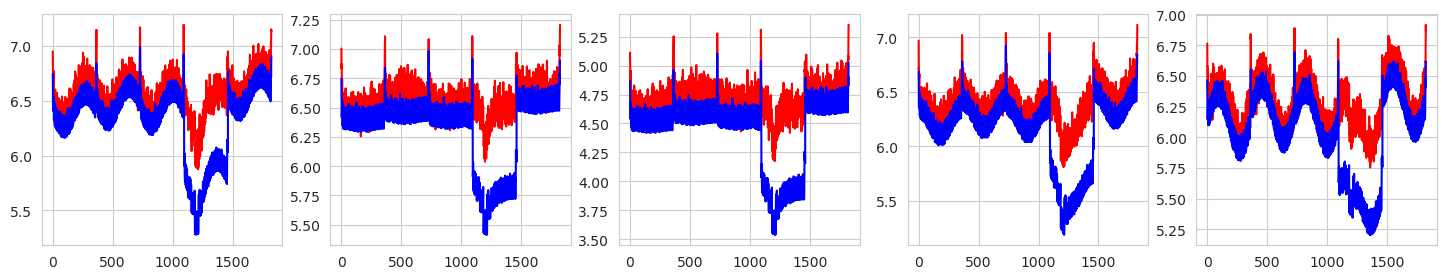

Estonia


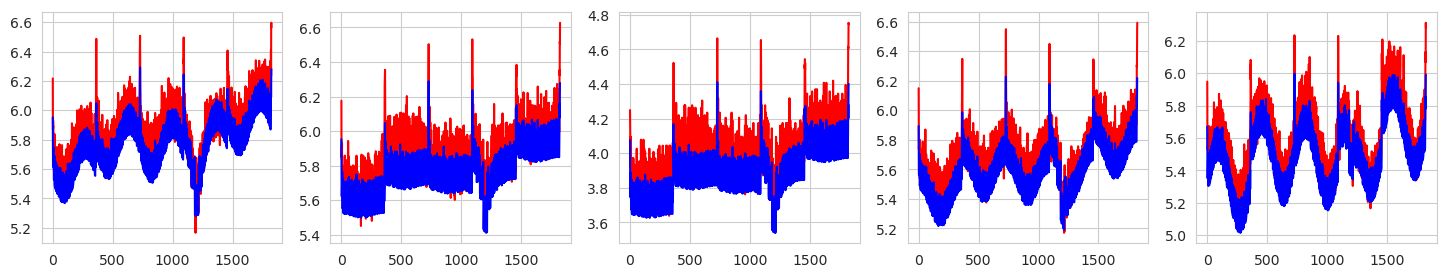

Japan


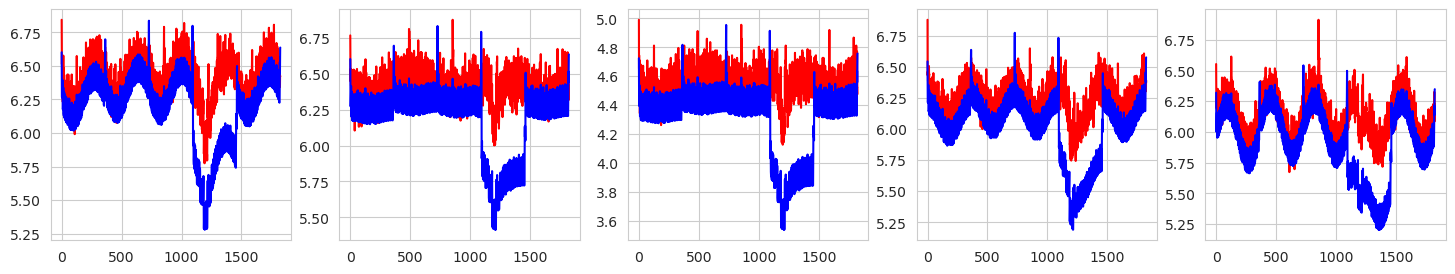

Spain


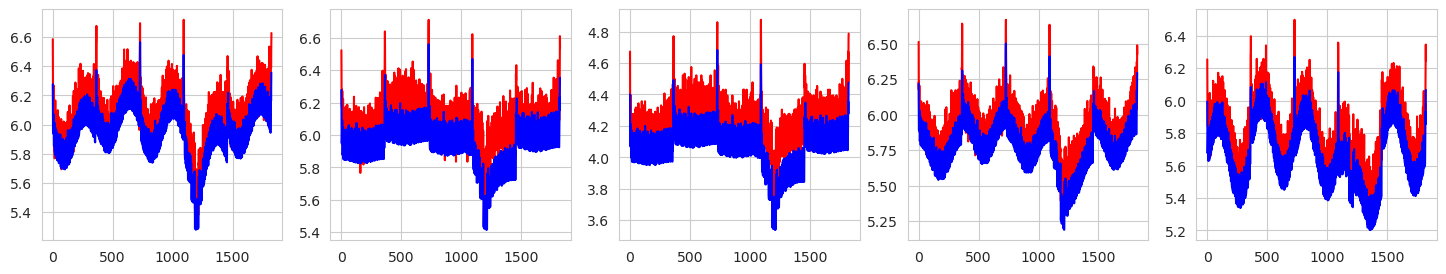

In [35]:
for country in uniques['country']:
    print(country)
    fig = plt.figure(figsize=(18, 3))
    
    result_graph = df.loc[(df['country'] == country) & 
                          (df['store'] == 'Kagglazon')]
    result_graph = result_graph.loc[result_graph['date'] < date]
    for i, product in enumerate(uniques['product']):
        view = result_graph.loc[result_graph['product'] == product]
        ax = fig.add_subplot(1, 5, i+1)
        ax.plot(view['time_no'], view['log'], color='red')
        ax.plot(view['time_no'], view['predict_log'], color='blue')

    plt.show()

Argentina


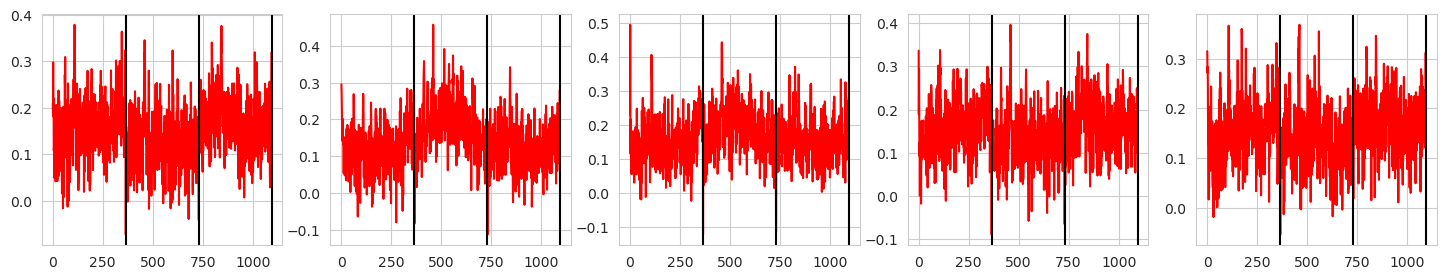

            date                           product  error_log
27387 2018-01-01  Win Friends and Influence People  -0.124168
54762 2019-01-01  Win Friends and Influence People  -0.116056
54761 2019-01-01                   Train More LLMs  -0.113851
27388 2018-01-01      Win More Kaggle Competitions  -0.089875
27386 2018-01-01                   Train More LLMs  -0.083518
20561 2017-10-02                   Train More LLMs  -0.079720
27385 2018-01-01               Improve Your Coding  -0.073306
54763 2019-01-01      Win More Kaggle Competitions  -0.065197
6161  2017-03-24                   Train More LLMs  -0.064202
41263 2018-07-05      Win More Kaggle Competitions  -0.057794
            date                           product  error_log
63235 2019-04-24               Improve Your Coding   0.376379
8185  2017-04-20               Improve Your Coding   0.378795
38561 2018-05-30                   Train More LLMs   0.391359
34438 2018-04-05      Win More Kaggle Competitions   0.396327
34512 20

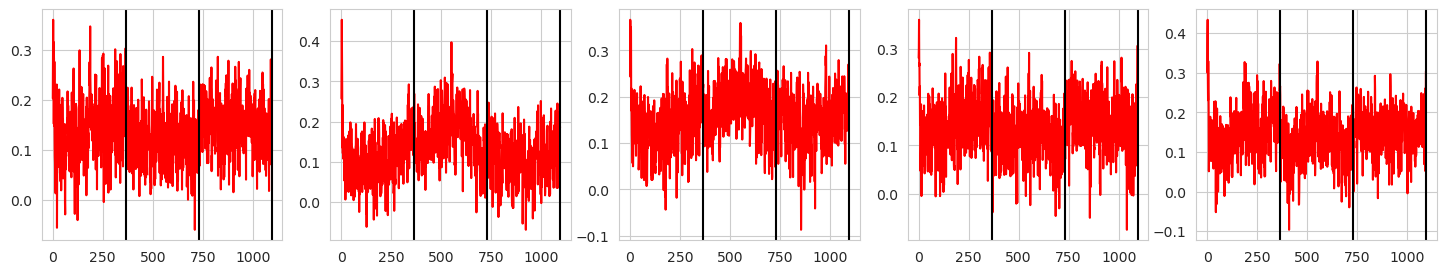

            date                           product  error_log
30704 2018-02-14                      Write Better  -0.096684
64152 2019-05-06  Win Friends and Influence People  -0.087046
78103 2019-11-08      Win More Kaggle Competitions  -0.074978
69176 2019-07-12                   Train More LLMs  -0.068592
9476  2017-05-07                   Train More LLMs  -0.061323
53275 2018-12-12               Improve Your Coding  -0.059432
1600  2017-01-22               Improve Your Coding  -0.055403
67976 2019-06-26                   Train More LLMs  -0.053249
3254  2017-02-13                      Write Better  -0.052191
64228 2019-05-07      Win More Kaggle Competitions  -0.050147
            date                           product  error_log
175   2017-01-03               Improve Your Coding   0.359574
178   2017-01-03      Win More Kaggle Competitions   0.360606
177   2017-01-03  Win Friends and Influence People   0.362546
102   2017-01-02  Win Friends and Influence People   0.365951
101   20

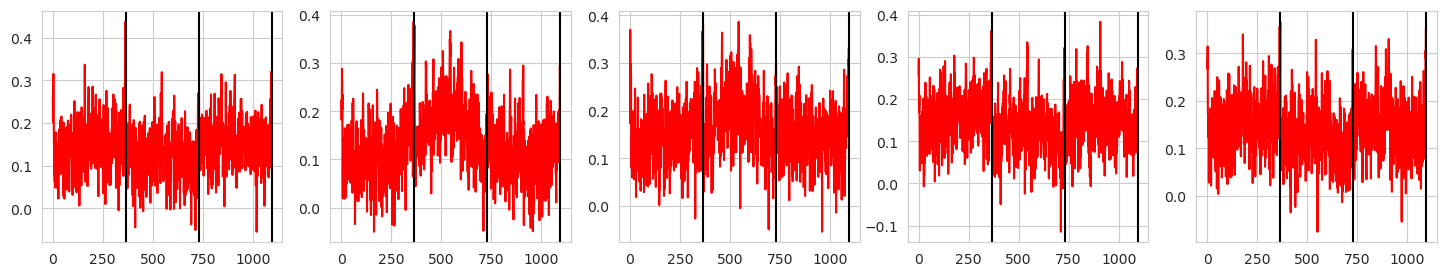

            date                           product  error_log
53368 2018-12-13      Win More Kaggle Competitions  -0.114725
41369 2018-07-06                      Write Better  -0.075892
76465 2019-10-17               Improve Your Coding  -0.055437
72944 2019-08-31                      Write Better  -0.054589
72042 2019-08-19  Win Friends and Influence People  -0.054011
53515 2018-12-15               Improve Your Coding  -0.051342
12266 2017-06-13                   Train More LLMs  -0.049785
30793 2018-02-15      Win More Kaggle Competitions  -0.049441
52017 2018-11-25  Win Friends and Influence People  -0.048754
71816 2019-08-16                   Train More LLMs  -0.048595
            date                           product  error_log
27117 2017-12-28  Win Friends and Influence People   0.365560
40841 2018-06-29                   Train More LLMs   0.366082
27419 2018-01-01                      Write Better   0.366625
117   2017-01-02  Win Friends and Influence People   0.369570
27416 20

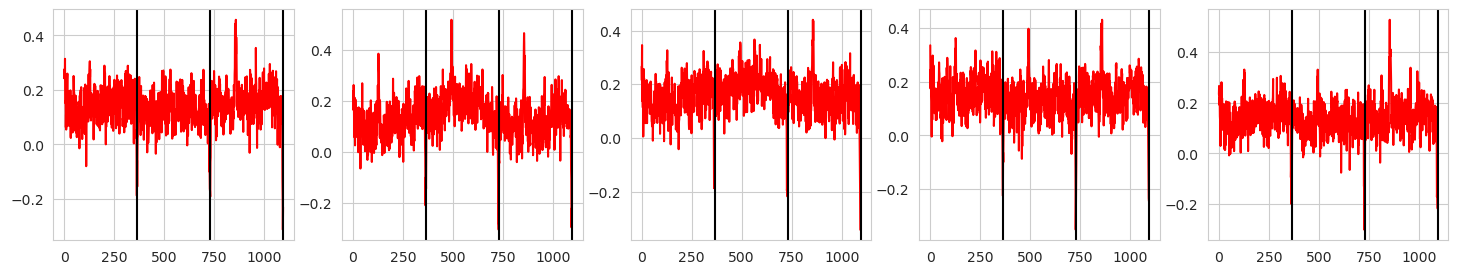

            date                           product  error_log
54583 2018-12-29      Win More Kaggle Competitions  -0.351424
82032 2019-12-30  Win Friends and Influence People  -0.341927
81955 2019-12-29               Improve Your Coding  -0.312659
54656 2018-12-30                   Train More LLMs  -0.306237
54584 2018-12-29                      Write Better  -0.301461
81956 2019-12-29                   Train More LLMs  -0.296980
54581 2018-12-29                   Train More LLMs  -0.287577
54506 2018-12-28                   Train More LLMs  -0.281974
54658 2018-12-30      Win More Kaggle Competitions  -0.278811
54731 2018-12-31                   Train More LLMs  -0.276413
            date                           product  error_log
64407 2019-05-09  Win Friends and Influence People   0.436548
64257 2019-05-07  Win Friends and Influence People   0.440220
64105 2019-05-05               Improve Your Coding   0.442061
64030 2019-05-04               Improve Your Coding   0.442112
64330 20

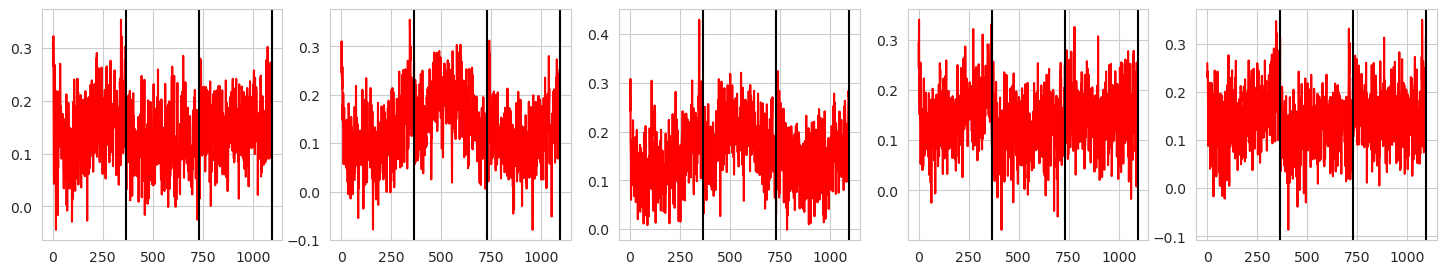

            date                       product  error_log
30449 2018-02-10                  Write Better  -0.086447
71771 2019-08-15               Train More LLMs  -0.078998
31123 2018-02-19  Win More Kaggle Competitions  -0.078711
11921 2017-06-08               Train More LLMs  -0.078349
6371  2017-03-26               Train More LLMs  -0.054699
52198 2018-11-27  Win More Kaggle Competitions  -0.052172
78896 2019-11-18               Train More LLMs  -0.051653
64496 2019-05-10               Train More LLMs  -0.045506
52273 2018-11-28  Win More Kaggle Competitions  -0.044835
1270  2017-01-17           Improve Your Coding  -0.044403
            date                           product  error_log
58498 2019-02-19      Win More Kaggle Competitions   0.325918
27298 2017-12-30      Win More Kaggle Competitions   0.330869
53174 2018-12-10                      Write Better   0.330906
25796 2017-12-10                   Train More LLMs   0.334040
223   2017-01-03      Win More Kaggle Competitions  

In [36]:
for country in uniques['country']:
    print(country)
    fig = plt.figure(figsize=(18, 3))
    
    result_graph = df.loc[(df['country'] == country) & 
                          (df['store'] == 'Kagglazon')]
    #result_graph = result_graph.loc[result_graph['date'] < date]
    result_graph = result_graph.loc[result_graph['date'] < dt.datetime(2019,12,31)]
    for i, product in enumerate(uniques['product']):
        view = result_graph.loc[result_graph['product'] == product]
        ax = fig.add_subplot(1, 5, i+1)
        ax.plot(view['time_no'], view['error_log'], color='red')
        ax.axvline(x=365, color='black')
        ax.axvline(x=730, color='black')
        ax.axvline(x=1095, color='black')
    plt.show()
    
    result_graph.sort_values('error_log', inplace=True)
    print(result_graph.head(10)[['date', 'product', 'error_log']])
    print(result_graph.tail(10)[['date', 'product', 'error_log']])

In [37]:
result = df.sort_values('id')
result = result.loc[result['date'] >= dt.datetime(2022, 1, 1), ['id', 'predict_exp']]
result.rename(columns={'predict_exp':'num_sold'}).to_csv('./predict_log.csv', header=True, index=False)